<a href="https://colab.research.google.com/github/rastr-0/portfolio_projects/blob/main/exploring_lorenz_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Exploring the Lorenz System of Differential Equations</h2>

### Foreword

In this notebook we will take a look at <b>Lorenz System</b>: build it with different plots and try to get understanding why small changes to initial conditions eventually lead to huge changes in the solutions. The Lorenz system is a system of ordinary differential equations first studied by Edward Lorenz. In 1963 it was developed as a simplified mathematical model for atmosperic convection. Now this system is known as:

\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}

The differential equations are written in terms of three dependent variables (***x***, ***y***, ***z***) and one independent variable ***t***, as well as three parameters: ***sigma***, ***rho*** and ***beta***. Lorenz was doing numerical experiments with Earth's atmosphere. This equations can be interpreted in this domain as ***x*** being the rate of convective overturning, ***y*** and ***z*** are the horizontal and
vertical temperature variations.
Earth's atmosphere is modeled using ***sigma***=10, ***beta***=8/3 (2.667), ***r*** controls the nonlinear dynamical behavior

Edward Lorenz came to the conclusion that if you build model by choosing values for ***x***, ***y*** and ***z***, and then, do it again with ***slightly*** different values you will get ***completely different*** results

You may still got the question why his work is so delightful and innovative for that time. The thing is, that in real world it's impossible to know exact value of any physical measurement. Lorenz showed the world what chaos is, by the way, it answers the question why predicting weather is so tall order, even with our super-quick computers.

Properties of these 3 equations:


*   ***Nonlinearity*** - It is non-linear in two places: the second equation has a xz term and the third has a xy term. It is made up of a very few simple components. The system is three-dimensional and deterministic. Although difficult to see until we plot the solution, the equation displays broken symmetry on multiple scales
*   ***Symmetry*** - Equations are invariant under the transformation ***(x, y)*** -> ***(-x, -y)***. So, if ***(x(t), y(t), z(t)***) is a solution, then ***(-x(t), -y(t), -z(t))*** is also a solution.



Let's build Lorenz System with matplotlib.

### Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from ipywidgets import interactive

### Model of Lorenz Attractor

In [ ]:
def lorenz(N=10, angle=0.0, max_time=4.0, sigma=10, rho=28, beta=2.667):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')
    
    # limits for axes
    ax.set_xlim((-30, 30))
    ax.set_ylim((-40, 40))
    ax.set_zlim((5, 60))

    def solve_lorenz(x_y_z):
        x, y, z = x_y_z
        return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # solve differential equations for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(solve_lorenz, x0i, t)
                                for x0i in x0])

    # each trajectory has its own color
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i, :, :].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)

    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    plt.show()

    return t, x_t

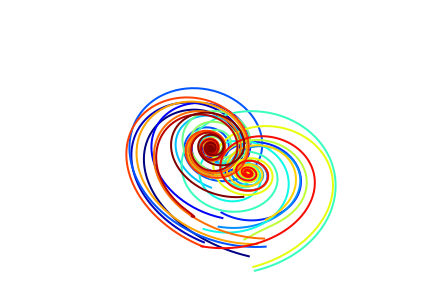

In [ ]:
# with angle we can control position of the attractor and with N amount of points
t, x_t = lorenz(angle=10, N=20)

### Interactive model of Lorenz Attractor

I also build interactive model for better clarity how initial values affect on a final model.

By variyng parameters we can get different results, try to play around with values.

In [ ]:
w = interactive(lorenz, angle=(0., 360,), N=(0, 50), sigma=(0.0, 50.0), rho=(0.0, 50.0))
display(w)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

### Scatter plots with different ***sigma***, ***rho*** and ***beta*** values

In [93]:
def build_attractor(sigma, rho, beta):
    def lorenz(x, y, z):
        return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

    # set parameters
    dt = 0.01
    num_steps = 6000
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)

    # initial values
    xs[0], ys[0], zs[0] = (0., 1., 1.05)

    # calculating the partial derivatives at the current point
    # and estimate the next point
    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)

    return [xs, ys, ys]

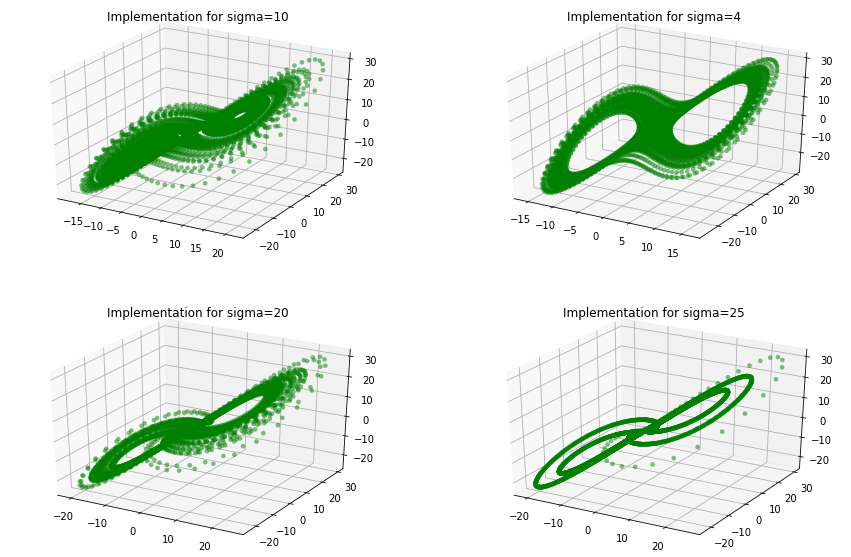

In [109]:
fig = plt.figure(figsize=(15, 10))

sigmas_values = [10, 4, 20, 25]
nums = [1, 2, 3, 4]

for (sigma, num) in zip(sigmas_values, nums):
  ax = fig.add_subplot(2, 2, num, projection='3d')

  xs, ys, zs = build_attractor(sigma=sigma, rho=28, beta=2.667)
  ax.scatter(xs, ys, zs, lw=0.1, alpha=0.5 ,color="green")
  ax.set_title(f"Implementation for sigma={sigma}")

plt.show()

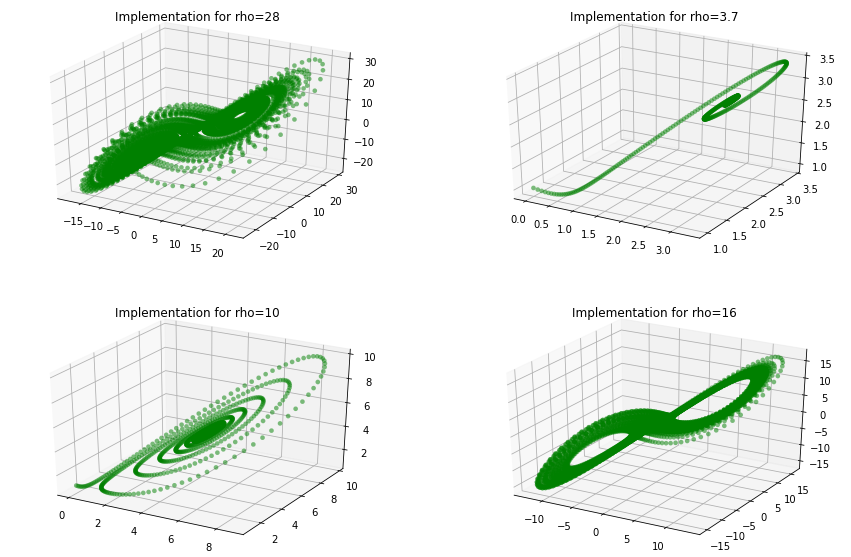

In [99]:
fig = plt.figure(figsize=(15, 10))

rho_values = [28, 3.7, 10, 16]
nums = [1, 2, 3, 4]

for (rho, num) in zip(rho_values, nums):
  ax = fig.add_subplot(2, 2, num, projection='3d')

  xs, ys, zs = build_attractor(sigma=10, rho=rho, beta=2.667)
  ax.scatter(xs, ys, zs, lw=0.1, alpha=0.5 ,color="green")
  ax.set_title(f"Implementation for rho={rho}")

plt.show()

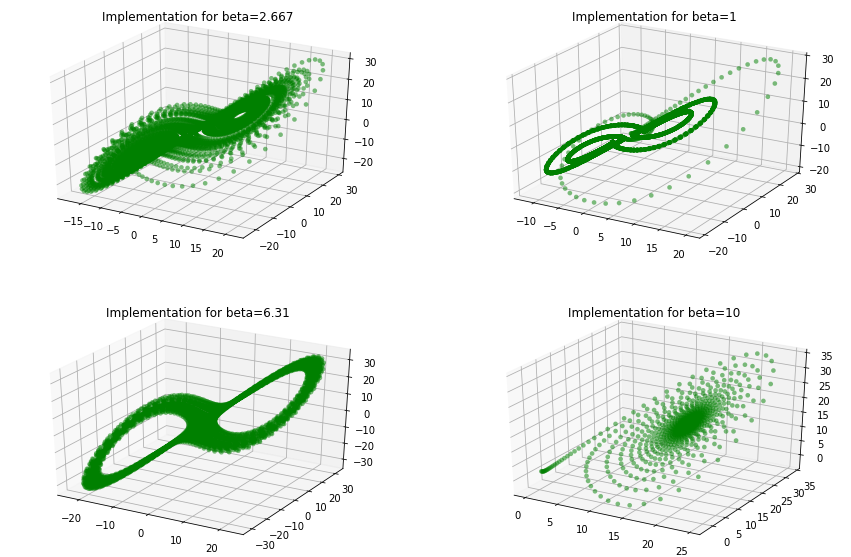

In [111]:
fig = plt.figure(figsize=(15, 10))

beta_values = [2.667, 1, 6.31, 10]
nums = [1, 2, 3, 4]

for (beta, num) in zip(beta_values, nums):
  ax = fig.add_subplot(2, 2, num, projection='3d')

  xs, ys, zs = build_attractor(sigma=10, rho=28, beta=beta)
  ax.scatter(xs, ys, zs, lw=0.1, alpha=0.5 ,color="green")
  ax.set_title(f"Implementation for beta={beta}")

plt.show()

You can have a look at various scatter plots with deffirent ***sigma***, ***rho*** and ***beta*** values and how this values affects on the final result.

I also would like to have a look at very informative plots regarding sensitive dependence on initial conditions.

### Plots showing sensitive dependence on initial conditions

In [106]:
def lorenz(t, xyz):
    x, y, z = xyz
    s, r, b = 10, 28, 8/3
    return [s*(y-x), x*(r-z) - y, x*y - b*z]

a, b = 0, 40
t = np.linspace(a, b, 4000)

sol1 = integrate.solve_ivp(lorenz, [a, b], [1,1,1], t_eval=t)
sol2 = integrate.solve_ivp(lorenz, [a, b], [1,1,1.00001], t_eval=t)

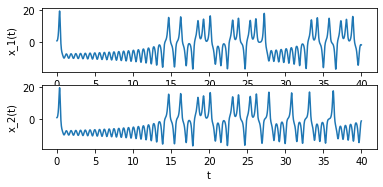

In [110]:
plt.subplot(3, 1, 1)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel("t")
plt.ylabel("x_1(t)")
plt.subplot(3, 1, 2)
plt.plot(sol2.t, sol2.y[0])
plt.xlabel("t")
plt.ylabel("x_2(t)")
plt.show()

As you can see even 0.00001 makes really big changes

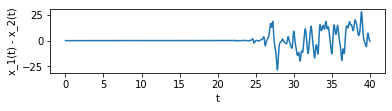

In [107]:
plt.subplot(3, 1, 3)
plt.plot(sol1.t, sol1.y[0] - sol2.y[0])
plt.ylabel("x_1(t) - x_2(t)")
plt.xlabel("t")
plt.show()

This one plot is showing x_1(t) - x_2(t) results

### RK4 method for solving differential equations and building Lorenz Attractor

Implementation of Lorenz Attractor with using the fourth-order Runge-Kutta (RK4) method has few advantages, as:


*   Stability: RK4 is a one-step method, which means that the solution at each time step only depends on the solution at the previous time step.
*   Accuracy: RK4 is a fourth-order numerical method, which means it has a local-error of O(dt^5), where ***dt*** is step size. This makes it more accurate than lower-order methods, such as Euler's method, for solving non-linear differential equations



I use following formulas for computing values with rk4 and then, solve ordinary differential equation (ODE) with generating values:


```
k1 = dt * f(x_i)
k2 = dt * f(x_i + 0.5 * k1)
k3 = dt * f(x_i + 0.5 * k2)
k4 = dt * f(x_i + k3)
x_{i+1} = x_i + (k1 + 2 * k2 + 2 * k3 + k4) / 6
```

*   ***f*** is the function that describes Lorenz Attractor
*   ***x_i*** is the current state of the system
*   ***dt*** is the time step
*   ***x_{i + 1}*** is the updated state of the system
*   ***k1***, ***k2***, ***k3***, ***k4*** are intermediate values for computing the updated state





In [122]:
def build_lorenz_plot(sigma=10, rho=28, beta=2.667):
  def lorenz(x):
      x, y, z = x[0], x[1], x[2]
      dx = np.zeros(3)
      dx[0] = sigma * (y - x)
      dx[1] = x * (rho - z) - y
      dx[2] = x * y - beta * z
      return dx

  # rk4 method
  def rk4(x, t, dt):
      k1 = dt * lorenz(x)
      k2 = dt * lorenz(x + 0.5 * k1)
      k3 = dt * lorenz(x + 0.5 * k2)
      k4 = dt * lorenz(x + k3)
      x_next = x + (k1 + 2 * k2 + 2 * k3 + k4) / 6
      return x_next

  # initial conditions
  x0 = [1.0, 1.0, 1.0]
  t0 = 0.0
  dt = 0.01
  T = 20.0

  # solve ODE using RK4 method
  x_rk4 = np.zeros((int(T/dt), 3))
  x_rk4[0, :] = x0
  for i in range(1, x_rk4.shape[0]):
      x_rk4[i, :] = rk4(x_rk4[i-1, :], t0 + (i-1) * dt, dt)

  # building plot  
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(x_rk4[:, 0], x_rk4[:, 1], x_rk4[:, 2], '-')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  #plt.savefig ('lorenz_plot.png')
  plt.show ( )

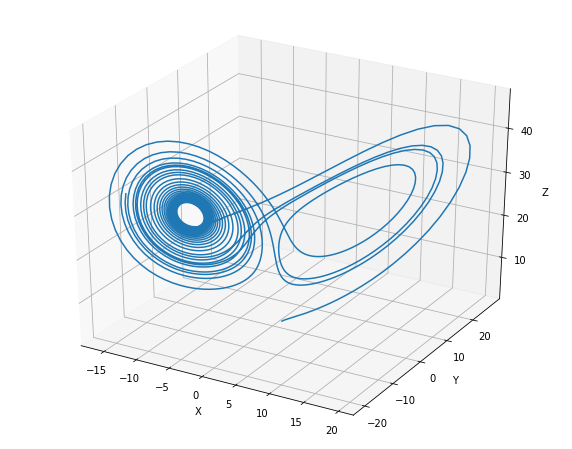

In [123]:
build_lorenz_plot(sigma=10, rho=28, beta=2.667)

### Afterword

One important thing you should understand is that Lorenz was not contrived to show chaos. Edward was lead to the system of differential equations in the course of his work modeling weather. Chaos was a shoking discovery, not his goal. It makes this discovery more fascinating as for me.